<a href="https://colab.research.google.com/github/ahwang16/grounded-intuition-gpt-vision/blob/master/Describing_Scientific_Images_with_GPT_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing Scientific Images with GPT-Vision

This Colab reproduces (to the extent possible) the generated passages from [Grounded Intuition of GPT-Vision's Abilities with Scientific Images](https://arxiv.org/abs/2311.02069). Data and generated passages are also available on [GitHub](https://github.com/ahwang16/grounded-intuition-gpt-vision/tree/master).

## Basic Setup and Imports

In [8]:
%%capture
!pip install openai

In [9]:
import base64
import os
import requests
from io import BytesIO
from IPython.display import Image, display
import json

## Data
You will need to upload images to Google Drive (persistent) or the Colab file system (temporary). You can download our images from [GitHub](https://github.com/ahwang16/grounded-intuition-gpt-vision/tree/master/images) or use your own. If you want to use Google Drive, run the following cell. We will update the data path later.

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## OpenAI API
Run the following cell to enter your [OpenAI API key](https://platform.openai.com/account/api-keys). If you don't have one, you'll need to make an account.

In [30]:
import openai
from getpass import getpass

if not openai.api_key:
  print('Enter OpenAI API key:')
  openai.api_key = getpass()

## Image Files and Context

In [43]:
PHOTOS = [
    "photo_p1_food.png",
    "photo_p2_cooking.png"
]

DIAGRAMS = [
    "diagram_d1_kani.png",
    "diagram_d2_rewrite.png",
    "diagram_d3_distillation.png"
]

GRAPHS = [
    "graph_g1_bars.png",
    "graph_g2_pies.png",
    "graph_g3_line.png",
    "graph_g4_lines.png"
]

TABLES = [
    "table_t1_participants.png",
    "table_t2_metrics.png",
    "table_t3_training.png"
]

FIGURES = PHOTOS + DIAGRAMS + GRAPHS + TABLES

FULL_PAGES = [
    "full-page_f1_first.png",
    "full-page_f2_large-figure.png",
    "full-page_f3_photo-table.png",
    "full-page_f4_large-table.png",
    "full-page_f5_haskell.png"
]

MATH = [
    "math_m1_equations.png",
    "math_m2_proof.png"
]

CODE = [
    "code_c1_pseudocode.png",
    "code_c2_haskell.png",
    "code_c3_python.png"
]

IMAGES = FIGURES + FULL_PAGES + MATH + CODE

CONTEXT = {
    "photo_p1_food.png" : {
        "caption": "Figure 3: Completed dishes. Cooks prepared a variety of dishes of their choice following the guidance of a voice assistant. These dishes varied in complexity: some required interaction with the voice assistant for many steps (i.e., C2's eggless red velvet cake), while others involved just a few (i.e., C12's ground beef bulgogi).",
        "paragraph": "Cooks followed recipes ranging in familiarity, complexity, length, and cultural origin, adding to the richness of their experiences beyond self-reported cooking skill and frequency of using voice assistants. Most recipes were entrées, with two being baked goods (C2, C8) (see Figure 3). Of the 12 cooks, 6 reported being unfamiliar with their recipe, 1 reported moderate familiarity, and 4 reported being familiar. Cooks followed an average of 8 steps per recipe (𝜎 = 2.9, min = 3, max = 11). Recipes may have included more than this number of steps: as noted in Section 4.2, cooks sometimes ended their sessions too early because they were unaware that there were additional steps that Alexa had not yet read. Cooking sessions ranged from 15 minutes to just over an hour."
    },
    "photo_p1-1_adversarial.png": {
        "caption": "Figure 3: Completed dishes. Cooks prepared a variety of dishes of their choice following the guidance of a voice assistant. These dishes varied in complexity: some required interaction with the voice assistant for many steps (i.e., C2's eggless red velvet cake), while others involved just a few (i.e., C12's ground beef bulgogi).",
        "paragraph": "Cooks followed recipes ranging in familiarity, complexity, length, and cultural origin, adding to the richness of their experiences beyond self-reported cooking skill and frequency of using voice assistants. Most recipes were entrées, with two being baked goods (C2, C8) (see Figure 3). Of the 12 cooks, 6 reported being unfamiliar with their recipe, 1 reported moderate familiarity, and 4 reported being familiar. Cooks followed an average of 8 steps per recipe (𝜎 = 2.9, min = 3, max = 11). Recipes may have included more than this number of steps: as noted in Section 4.2, cooks sometimes ended their sessions too early because they were unaware that there were additional steps that Alexa had not yet read. Cooking sessions ranged from 15 minutes to just over an hour."
    },
    "photo_p2_cooking.png": {
        "caption": "Figure 1: Study setting. Participants followed recipes of their choice with the help of Amazon Alexa (Echo Dot, circled on the right). Participants were observed at home and encouraged to cook however felt natural as we observed, only occasionally asking clarifying questions. We filmed the session with a camera on a tripod out of the way of the kitchen.",
        "paragraph": "We designed an observational study to understand how voice assistants can effectively guide people through complex tasks, using recipes as an example. We recruited participants to choose and prepare recipes at home while being guided by a voice assistant (see Figure 1). We aimed to answer the following research questions:"
    },
    "diagram_d1_kani.png": {
        "caption": "Figure 1: Kani is a lightweight and flexible framework that tracks chat history, calls inference engines, and manages callable functions in an un-opinionated manner---allowing researchers and developers to implement custom functionality easily and quickly.",
        "paragraph": "Language model applications are becoming increasingly popular and complex, often including features such as tool usage and retrieval augmentation. However, existing frameworks for such applications are often opinionated, deciding for developers how their prompts ought to be formatted and imposing limitations on customizability and reproducibility. To solve this we present Kani: a lightweight, flexible, and model-agnostic framework for developing LM applications. Kani helps developers implement a variety of complex features by supporting the core building blocks of chat interaction: model interfacing, chat management, and robust function calling. All Kani core functions are easily overridable and extensively documented to empower developers to customize functionality for their own needs. Kani thus serves as a useful tool for researchers, hobbyists, and industry professionals alike to accelerate their development while retaining fine-grained control and interoperability."
    },
    "diagram_d2_rewrite.png": {
        "caption": "Figure 5: A sample transformation after “rewriting the script.” Among other changes, a set of instructions should be split into easier-to-follow chunks; information should be redistributed, with details appearing where they would be most useful; and the voice assistant should summarize and signpost to help users understand where they are in a procedure. An effective voice assistant for providing instructions will have to perform all of these tasks in a coordinated way to effectively provide task support. Example from Tuscan Butter Salmon recipe [34]. Photo of spinach by Jessica and Lon Binder on Flickr [5].",
        "paragraph": "We propose eight key capabilities that a “rewriter of scripts” should have, which are grounded in our observational study (Sec. 4). We believe these capabilities are especially suited to the current era of computing given the recent advances in natural language processing research (see Table 3). We offer a concrete vision of what rewriting the script might look like in Figure 5, which includes:"
    },
    "diagram_d3_distillation.png": {
        "caption": "Figure 1: Symbolic knowledge distillation extracts the commonsense from the large, general language model GPT-3, into 2 forms: a large commonsense knowledge graph ATOMIC10x, and a compact commonsense model COMETDIS TIL. The quality of this knowledge can be controlled and improved by adding a critic model, making GPT-3 a stronger teacher.",
        "paragraph": "The common practice for training commonsense models has gone from–human–to– corpus–to–machine: humans author commonsense knowledge graphs in order to train commonsense models. In this work, we investigate an alternative, from–machine–to–corpus– to–machine: general language models author these commonsense knowledge graphs to train commonsense models. Our study leads to a new framework, Symbolic Knowledge Distillation. As with prior art in Knowledge Distillation (Hinton et al., 2015), our approach uses larger models to teach smaller models. A key difference is that we distill knowledge symbolically–as text–in addition to the resulting neural model. We distill only one aspect–the commonsense of a general language model teacher, allowing the student to be a different type of model, a commonsense model. Altogether, we show that careful prompt engineering and a separately trained critic model allow us to selectively distill highquality causal commonsense from GPT-3, a general language model. Empirical results demonstrate that, for the first time, a human-authored commonsense knowledge graph is surpassed by our automatically distilled variant in all three criteria: quantity, quality, and diversity. In addition, it results in a neural commonsense model that surpasses the teacher model’s commonsense capabilities despite its 100x smaller size. We apply this to the ATOMIC resource, and will share our new symbolic knowledge graph and commonsense models1 ."
    },
    "graph_g1_bars.png": {
        "caption": "Figure 6: We see that human sentences tended to have a different number of named entities than generated sentences. Players picked up on the correct trend in Stories, but not in News or Speeches.",
        "paragraph": "What sentence-level features could be used to detect generated text? It has been well-studied how generated text differs in basic, measurable ways from human-written text, often due to the choice of decoding strategy. In particular, we measured how sentence length, part-of-speech distribution, and presence of named entities and novel words differed between the generated and human-written sentences in our dataset, and whether players were able to pick up on these differences. Figure 6 shows the results for named entities, where novel named entities are ones which occured in the current sentence but not in any previous sentences. We found surprisingly different trends across different genres. On News and Recipes, the generated sentences tended to have fewer named entities than in human-written sentences. Annotators did not pick up on these trends, though they may have picked up on the fact that for Stories, the generated sentences tended to have slightly more named entities."
    },
    "graph_g2_pies.png": {
        "caption": "Figure A10: The reasons provided by players as to why a given example was generated broken up per model that generated the text",
        "paragraph": "Figure A9 shows the full text of the reasons players could choose between for their boundary decisions, as well as some “other” responses we received. Figure A10 hows a more detailed breakdown of the percentage of errors made by different models. We see that using p = 1.0 results in a higher percentage of “irrelevant” errors (36%) than p = 0.0 (31%) and p = 0.4 (28%) while models decoded using p = 0.0 in turn have a higher percentage of “generic” errors. We also see that smaller models tend to make more “irrelevant” errors than larger models (39% vs. 28%). Future work should seek to understand not only the distribution of the types of errors made by certain generative models but also the ways in which that distribution changes given factors such as domain, model size, and decoding strategy."
    },
    "graph_g3_line.png": {
        "caption": "Figure 3.2: On LAMBADA, the few-shot capability of language models results in a strong boost to accuracy. GPT-3 2.7B outperforms the SOTA 17B parameter Turing-NLG [Tur20] in this setting, and GPT-3 175B advances the state of the art by 18%. Note zero-shot uses a different format from one-shot and few-shot as described in the text.",
        "paragraph": "The LAMBADA dataset [PKL+16] tests the modeling of long-range dependencies in text – the model is asked to predict the last word of sentences which require reading a paragraph of context. It has recently been suggested that the continued scaling of language models is yielding diminishing returns on this difficult benchmark. [BHT+20] reflect on the small 1.5% improvement achieved `by a doubling of model size between two recent state of the art results ([SPP+19] and [Tur20]) and argue that “continuing to expand hardware and data sizes by orders of magnitude is not the path forward”. We find that path is still promising and in a zero-shot setting GPT-3 achieves 76% on LAMBADA, a gain of 8% over the previous state of the art."
    },
    "graph_g4_lines.png": {
        "caption": "Figure 3.8: Performance on SuperGLUE increases with model size and number of examples in context. A value of K = 32 means that our model was shown 32 examples per task, for 256 examples total divided across the 8 tasks in SuperGLUE. We report GPT-3 values on the dev set, so our numbers are not directly comparable to the dotted reference lines (our test set results are in Table 3.8). The BERT-Large reference model was fine-tuned on the SuperGLUE training set (125K examples), whereas BERT++ was first fine-tuned on MultiNLI (392K examples) and SWAG (113K examples) before further fine-tuning on the SuperGLUE training set (for a total of 630K fine-tuning examples). We find the difference in performance between the BERT-Large and BERT++ to be roughly equivalent to the difference between GPT-3 with one example per context versus eight examples per context.",
        "paragraph": "Finally, we note that the few-shot SuperGLUE score steadily improves with both model size and with number of examples in the context showing increasing benefits from in-context learning (Figure 3.8). We scale K up to 32 examples per task, after which point additional examples will not reliably fit into our context. When sweeping over values of K, we find that GPT-3 requires less than eight total examples per task to outperform a fine-tuned BERT-Large on overall SuperGLUE score."
    },
    "table_t1_participants.png": {
        "caption": "Table 1: Participants. Participants were mostly graduate students and chose a wide variety of recipes to prepare. They represented a range of cooking skill (\"Self-Rated Skill\" on a 5-point Likert scale) and frequency of voice assistant usage (\"Prior Use\").",
        "paragraph": "The selected sample of participants varied a great deal in cooking skill and familiarity with voice assistants (see Table 1). Since participants would be completing a task while interacting with a sophisticated piece of technology, we selected for diversity in both areas to learn about a fuller range of experiences. On a 5-point Likert scale (where 5 indicated a great amount of skill), five participants reported their cooking skill at a level of 2 or below, five participants reported 4 or above, and two participants reported exactly 3. Participants also used voice assistants with varying levels of frequency, with two using them daily, four weekly, one monthly, and five less than monthly. Some were excited to experiment with, voice assistants, with seven rating their excitement at 4 or 5 out of 5 on a Likert scale; four participants were less excited at a 2 or 3."
    },
    "table_t1-1_caption.png": {
        "caption": "Table 1: Participants. Participants were mostly graduate students and chose a wide variety of recipes to prepare. They represented a range of cooking skill (\"Self-Rated Skill\" on a 5-point Likert scale) and frequency of voice assistant usage (\"Prior Use\").",
        "paragraph": "The selected sample of participants varied a great deal in cooking skill and familiarity with voice assistants (see Table 1). Since participants would be completing a task while interacting with a sophisticated piece of technology, we selected for diversity in both areas to learn about a fuller range of experiences. On a 5-point Likert scale (where 5 indicated a great amount of skill), five participants reported their cooking skill at a level of 2 or below, five participants reported 4 or above, and two participants reported exactly 3. Participants also used voice assistants with varying levels of frequency, with two using them daily, four weekly, one monthly, and five less than monthly. Some were excited to experiment with, voice assistants, with seven rating their excitement at 4 or 5 out of 5 on a Likert scale; four participants were less excited at a 2 or 3."
    },
    "table_t2_training.png" : {
        "caption": "Table 4 Comparison of alignment error rate percentages for various training schemes (Verbmobil task; Dice+C: Dice coefficient with competitive linking).",
        "paragraph": "Tables 4 and 5 compare the alignment quality achieved using various models and training schemes. In general, we observe that the refined models (Models 4, 5, and 6) yield significantly better results than the simple Model 1 or Dice coefficient. Typically, the best results are obtained with Model 6. This holds across a wide range of sizes for the training corpus, from an extremely small training corpus of only 500 sentences up to a training corpus of 1.5 million sentences. The improvement that results from using a larger training corpus is more significant, however, if more refined models are used. Interestingly, even on a tiny corpus of only 500 sentences, alignment error rates under 30% are achieved for all models, and the best models have error rates somewhat under 20%."
    },
    "table_t3_metrics.png" : {
        "caption": "Table 18 Effect of alignment combination on precision, recall, and alignment error rate (Hansards task + dictionary). All figures are percentages.",
        "paragraph": "The effect of merging alignments by forming the intersection, the union, or the refined combination of the Viterbi alignments in both translation directions is shown in Tables 17 and 18. Figure 5 shows the corresponding precision/recall graphs. By using the refined combination, we can increase precision and recall on the Hansards task. The lowest alignment error rate on the Hansards task is obtained by using the intersection method. By forming a union or intersection of the alignments, we can obtain very high recall or precision values on both the Hansards task and the Verbmobil task."
    }
}

## Data Path
Update your data path here.

In [42]:
MAX_TOKENS = 2000
DATA_PATH = "/content/drive/..." # TODO

## Generation Functions

In [32]:
def get_image_in_base64(image_path):
  with open(image_path, 'rb') as img_file:
    image_data = img_file.read()
    image_b64 = base64.b64encode(image_data).decode('utf-8')

    return image_b64


def load_json(filename):
  if os.path.isfile(filename):
    with open(filename) as json_file:
      data = json.load(json_file)
      return data

  return {}


def save_json(data, filename):
  with open(filename, "w") as outfile:
    json.dump(data, outfile)


def get_image_type_from_file_name(filename):
  image_type = filename.split("_")[0]

  if image_type in {"photo", "diagram", "graph", "table"}:
    return "figure"
  elif image_type == "full-page":
    return "page"
  else:
    return "image"


def get_prompts(input_type):
  alt = f"Write alt text for this {input_type}."
  desc = f"Describe this {input_type} as though you are speaking with someone who cannot see it."

  return [alt, desc]

In [36]:
def generate_description(image_b64, prompt, caption=None, paragraph=None):
  messages = [
      {
          "role": "system",
          "content": "You are ChatGPT, a large language model trained by OpenAI capable of looking at images.\nCurrent date: 2023-03-05\nKnowledge cutoff: 2022-02\nImage Capabilities: Enabled",
    }
  ]

  if paragraph:
    messages.append({
        "role": "user",
        "content": [paragraph]
    })

  if caption:
    messages.append({
        "role": "user",
        "content": [
            caption,
            {
                "image": image_b64,
                "resize": 768
            }
        ]
    })
  else:
    messages.append({
        "role": "user",
        "content": [{
            "image": image_b64,
            "resize": 768
        }]
    })

  messages.append({
      "role": "user",
      "content": [prompt]
  })

  payload = {
      "model": "gpt-4-vision-preview",
      "messages": messages,
      "max_tokens": MAX_TOKENS
  }

  headers = {
      "Content-Type": "application/json",
      "Authorization": f"Bearer {openai.api_key}"
  }

  response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload).json()

  return response.["choices"][0]["message"]["content"]


def describe_images(images, prompts, show_image=False, print_mode=False, output_file=None):
  for image_path in images:
    image_b64 = get_image_in_base64(image_path)

    if show_image:
        display(Image(url='data:image/jpg;base64,' + image_b64, width=500))

    for prompt in prompts:
      _, image_file = os.path.split(image_path)  # <name>.<ext>
      image_name = image_file.split(".")[0]  # <name>

      if image_name.split("_")[0] == "full-page":
        caption = None
        paragraph = None
      else:
        caption = CONTEXT[image_file]["caption"]
        paragraph = CONTEXT[image_file]["paragraph"]

      output = generate_description(image_b64, prompt, caption=caption, paragraph=paragraph)

      if print_mode:
        print(f"Image: {image_name}\nPrompt: {prompt}\nOutput: {output}\n###\n")

      if output_file:
        with open(output_file, "a") as outfile:
          outfile.write(f"Image: {image_name}\nPrompt: {prompt}\nOutput: {output}\n###\n")

  return output

## Examples

In [15]:
# You can use get_prompts() to generate the same prompts we used. It takes one parameter.
#   input_type (str): the image type
# If you the image files we provided with the original file names, you can use get_image_type_from_file_name() like this:

for example in ["photo_p1_food.png", "full-page_f1_first.png", "code_c1_pseudocode.png"]:
  for prompt in get_prompts(get_image_type_from_file_name(example)):
      print(f"{prompt}")
  print("###\n")

Write alt text for this figure.
Describe this figure as though you are speaking with someone who cannot see it.
###

Write alt text for this page.
Describe this page as though you are speaking with someone who cannot see it.
###

Write alt text for this image.
Describe this image as though you are speaking with someone who cannot see it.
###




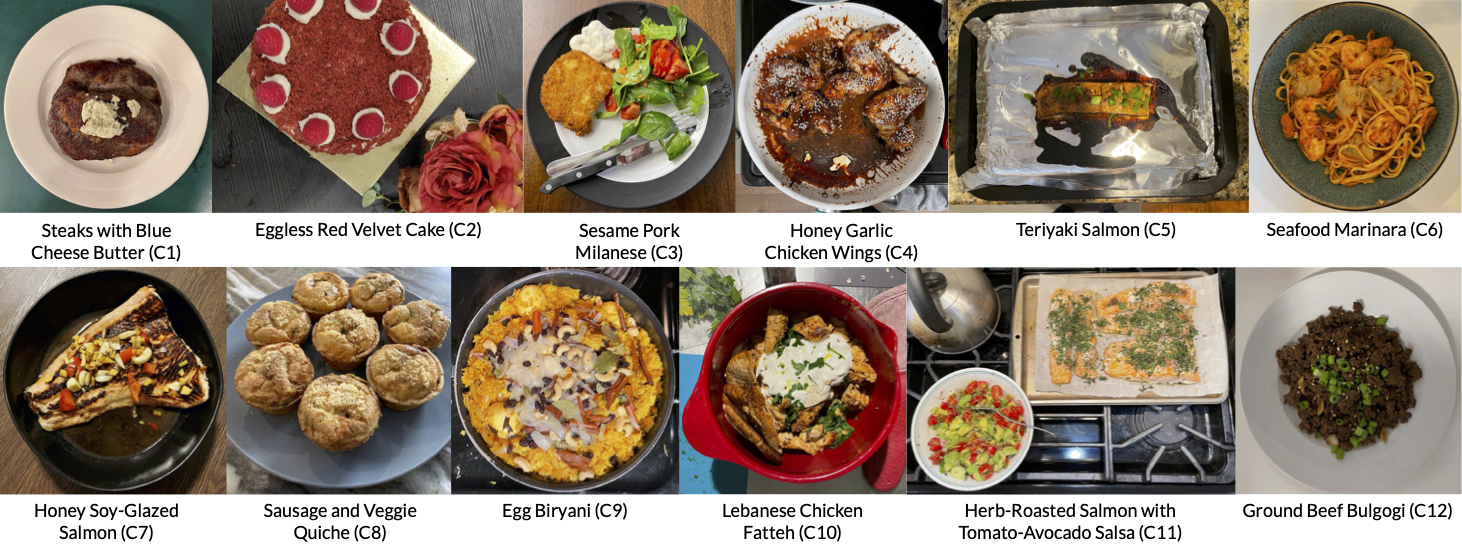

Image: photo_p1_food
Prompt: Write alt text for this figure.
Output: None
###

Image: photo_p1_food
Prompt: Describe this figure as though you are speaking with someone who cannot see it.
Output: None
###



In [41]:
# You can use describe_images() to generate output on for any number of images and prompts.
# images: list of image paths
# prompts: list of prompts
# Set show_image=True if you would like the image to be displayed in Colab (default: False).
# Set print_mode=True if you would like each image name, prompt, and output to be printed (default: False).
# Set output_file="..." to the path of a file to save the output (default: None - not saved).

describe_images(images=[os.path.join(DATA_PATH, "photo_p1_food.png")], prompts=get_prompts("figure"), show_image=True, print_mode=True, output_file=None)